# Variante 2 de LenNet5

## Réalisé par : Ahmed Mrabet

Dans ce notebook, nous allons effectuer une implémentation de la variante 2 de l'architecture LeNet5. Cette variante contient les modifications suivantes par rapport à l'architecture de la variante 1 :
-	Ajouter une autre couche
-	Augmenter le nombre de filtres
-	Réduire le taux d’apprentissage
-	Augmenter le nombre d’epochs a 10

In [31]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

## Nouveau modèle CNN

### Step 1: Dataset

In [32]:
img_height = 32
img_width = 32
batch_size = 64

train_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/train/", image_size=(img_height, img_width), batch_size=batch_size)
test_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/test/", image_size=(img_height, img_width), batch_size=batch_size)
validation_dataset =  tf.keras.utils.image_dataset_from_directory("chest_xray_dataset/validation/", image_size=(img_height, img_width), batch_size=batch_size)

Found 4142 files belonging to 3 classes.
Found 1375 files belonging to 3 classes.
Found 1385 files belonging to 3 classes.


#### Visualisation des données

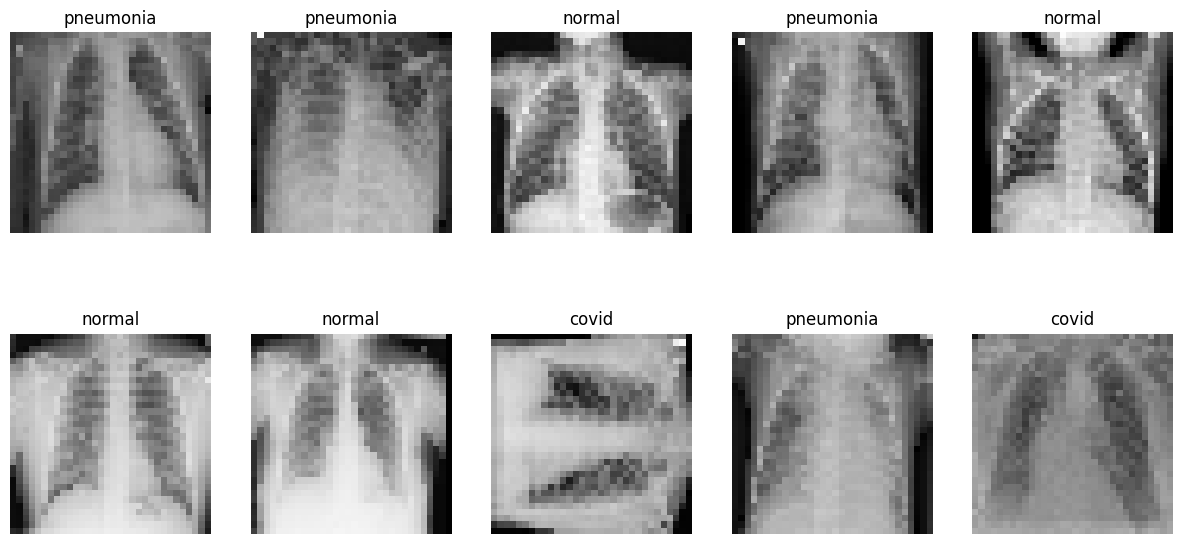

In [33]:
class_names = train_dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_dataset.take(1):
    for i in range(10):
        ax = plt.subplot(4, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")
plt.show()

In [34]:
def convert_to_grayscale(image, label):
    image = tf.image.rgb_to_grayscale(image)  # Convert to grayscale
    return image, label

train_dataset = train_dataset.map(convert_to_grayscale)
validation_dataset = validation_dataset.map(convert_to_grayscale)
test_dataset = test_dataset.map(convert_to_grayscale)

### Step 2: Création du modèle

In [35]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (
    Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
)

In [37]:
model = Sequential([    
    Rescaling(1./255),
    
    Conv2D(32, kernel_size=(3, 3), activation='leaky_relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(64, kernel_size=(3, 3), activation='leaky_relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),
    
    Conv2D(128, kernel_size=(3, 3), activation='leaky_relu'),
    MaxPooling2D(pool_size=(2, 2), strides=2),

    Flatten(),
    Dense(84, activation='leaky_relu'),
    Dense(3, activation='softmax')  # 3 classes: Normal, Pneumonia, COVID
])

### Step 3: Paramétrage du modèle

In [38]:
model.compile(
  optimizer=tf.optimizers.Adam(learning_rate=0.001), 
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True), 
  metrics=['accuracy']
)

### Step 4: Training du modèle

In [39]:
model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=10
)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 26s 348ms/step - accuracy: 0.5001 - loss: 0.9702 - val_accuracy: 0.7682 - val_loss: 0.5757
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 18s 276ms/step - accuracy: 0.8039 - loss: 0.5303 - val_accuracy: 0.8455 - val_loss: 0.4436
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 295ms/step - accuracy: 0.8497 - loss: 0.4357 - val_accuracy: 0.8671 - val_loss: 0.3729
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 335ms/step - accuracy: 0.8732 - loss: 0.3678 - val_accuracy: 0.8780 - val_loss: 0.3493
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 343ms/step - accuracy: 0.8916 - loss: 0.3375 - val_accuracy: 0.8975 - val_loss: 0.3016
Epoch 6/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 331ms/step - accuracy: 0.9078 - loss: 0.2922 - val_accuracy: 0.9069 - val_loss: 0.2884
Epoch 7/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 329ms/step - accuracy: 0.9133 - loss: 0.2733 - val_accuracy: 0.9155 - val_loss: 0.2609
Epoch 8/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 21s 319ms/step - accuracy: 0.9307 - loss: 0.2256 - val_accu

### Step 5: Test

In [41]:
model.evaluate(test_dataset, verbose=2)

22/22 - 5s - 238ms/step - accuracy: 0.9345 - loss: 0.2378


[0.23776638507843018, 0.9345454573631287]